<a href="https://colab.research.google.com/github/dana-prthv/LINYA-Internship/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [51]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
url = 'https://raw.githubusercontent.com/dana-prthv/LINYA-Internship/main/Sales.csv'
df=pd.read_csv(url)
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [53]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [55]:
df.shape

(240, 9)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      North America
1             Europe
2               Asia
3      North America
4             Europe
           ...      
235           Europe
236             Asia
237    North America
238           Europe
239             Asia
Name: Region, Length: 240, dtype: object

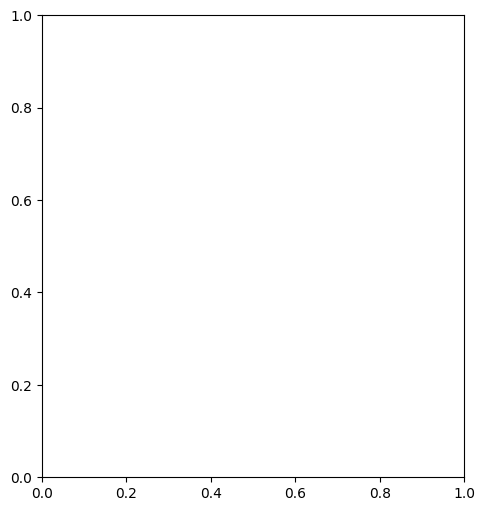

In [56]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Units Sold'], df['Total Revenue'], c=df['Region'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.title('Pre-KNN Visualization of Data')

In [ ]:
label_encoders = {}
categorical_columns = ['Product Category', 'Product Name', 'Region', 'Payment Method']

In [57]:
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [58]:
X = df.drop(['Transaction ID', 'Date', 'Region'], axis=1)  # Features
y = df['Region']

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

In [61]:
k_values = range(1, 21)
accuracies = []

In [62]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'K={k}: Accuracy={accuracy:.2f}')

K=1: Accuracy=1.00
K=2: Accuracy=0.98
K=3: Accuracy=1.00
K=4: Accuracy=1.00
K=5: Accuracy=1.00
K=6: Accuracy=1.00
K=7: Accuracy=1.00
K=8: Accuracy=1.00
K=9: Accuracy=1.00
K=10: Accuracy=1.00
K=11: Accuracy=1.00
K=12: Accuracy=1.00
K=13: Accuracy=1.00
K=14: Accuracy=1.00
K=15: Accuracy=1.00
K=16: Accuracy=0.98
K=17: Accuracy=1.00
K=18: Accuracy=0.96
K=19: Accuracy=0.98
K=20: Accuracy=0.96


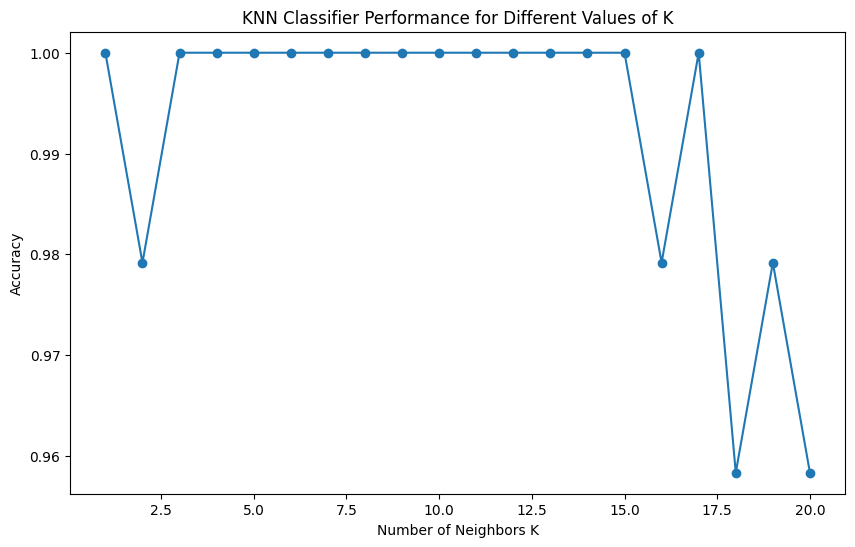

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Performance for Different Values of K')
plt.show()

In [64]:
best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best K: {best_k}, Accuracy: {max(accuracies):.2f}')

Best K: 1, Accuracy: 1.00
